# DIABETES PREDICTION MODEL 2.
In this exercise, I wil apply the following:
* Checking and handling outliers.
* Some feature selection.
* Balancing the dataset using SMOTE.
* Creating a predictive model using different classifiers.

# ***1. Importing Different Libraries.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import GenericUnivariateSelect, chi2


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# ***2. Loading the dataset.***

In [2]:
df = pd.read_csv('data.csv')

df.head()

,No Info,current,ever,former,never,not current,HbA1c_level,age,blood_glucose_level,bmi,gender,heart_disease,hypertension,diabetes
0,0,0,0,0,1,0,6.6,80.0,140,25.19,0,1,0,0
1,1,0,0,0,0,0,6.6,54.0,80,27.32,0,0,0,0
2,0,0,0,0,1,0,5.7,28.0,158,27.32,1,0,0,0
3,0,1,0,0,0,0,5.0,36.0,155,23.45,0,0,0,0
4,0,1,0,0,0,0,4.8,76.0,155,20.14,1,1,1,0


# ***3. Checking and Handling Outliers***

In [3]:
df.describe()

,No Info,current,ever,former,never,not current,HbA1c_level,age,blood_glucose_level,bmi,gender,heart_disease,hypertension,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,0.342054,0.095675,0.041580,0.096736,0.357804,0.066151,5.532633,41.796617,138.218001,27.321450,0.415769,0.040810,0.077615,0.088237
std,0.474400,0.294146,0.199628,0.295599,0.479357,0.248548,1.073225,22.463329,40.911190,6.767811,0.492857,0.197851,0.267567,0.283640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.080000,80.000000,10.010000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,24.000000,100.000000,23.400000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000,43.000000,140.000000,27.320000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.200000,59.000000,159.000000,29.860000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,80.000000,300.000000,95.690000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: xlabel='age'>

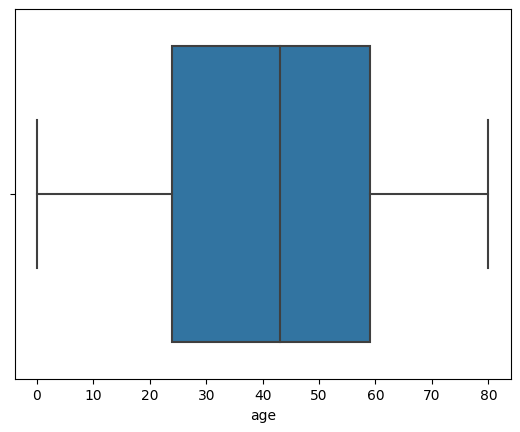

In [4]:
sns.boxplot(df, x='age')

<AxesSubplot: xlabel='bmi'>

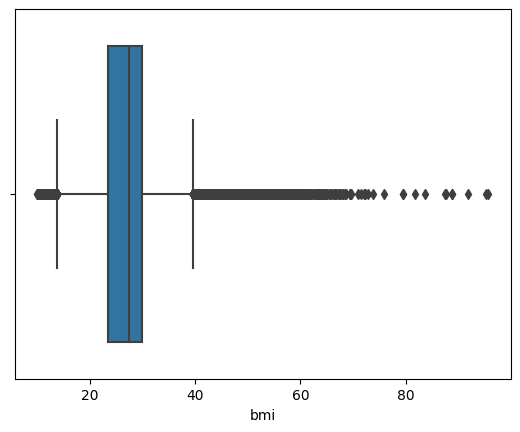

In [5]:
sns.boxplot(df, x='bmi')

<AxesSubplot: xlabel='blood_glucose_level'>

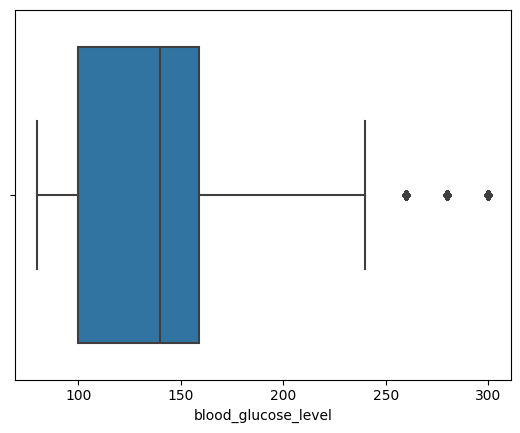

In [6]:
sns.boxplot(df, x='blood_glucose_level')

<AxesSubplot: xlabel='HbA1c_level'>

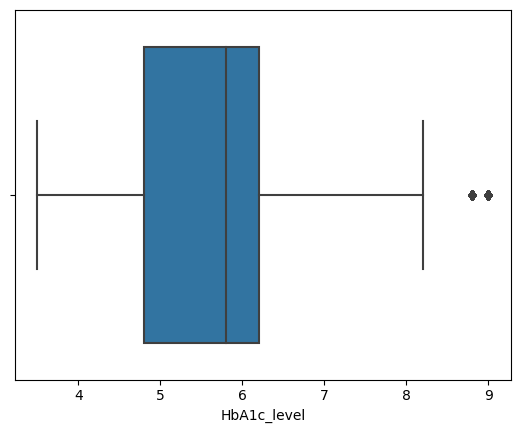

In [7]:
sns.boxplot(df, x='HbA1c_level')

From the above, the ***bmi, blood_glucose_level*** and ***HbA1c_level*** columns have some outliers.
For the exercise, I will handle the outliers by replacing them with the ***mean*** or ***mode*** of the column(s).

In [8]:
print(f'The  mean for HbA1c_level is {df.HbA1c_level.mean()}, while the mode is {df.HbA1c_level.mode()}')
print(f'The mean for blood_glucose_level is {df.blood_glucose_level.mean()}, while the mode is {df.blood_glucose_level.mode()}')
print(f'The  mean for bmi is {df.bmi.mean()}, while the mode is {df.bmi.mode()}')

The  mean for HbA1c_level is 5.532632531624501, while the mode is 0    6.6
Name: HbA1c_level, dtype: float64
The mean for blood_glucose_level is 138.21800099866843, while the mode is 0    159
Name: blood_glucose_level, dtype: int64
The  mean for bmi is 27.321450253828225, while the mode is 0    27.32
Name: bmi, dtype: float64


I will replace the outliers of the different columns using the means.

I won't handle the outliers in the ***bmi*** column since i will drop it later.

In [9]:

df['HbA1c_level'] = np.where(
    df['HbA1c_level'] > 8.2,
    df['HbA1c_level'].mean(),
    df['HbA1c_level']
)

df['blood_glucose_level'] = np.where(
    df['blood_glucose_level'] > 230,
    df['blood_glucose_level'].mean(),
    df['blood_glucose_level']
)


# ***4. Feature Selection.***


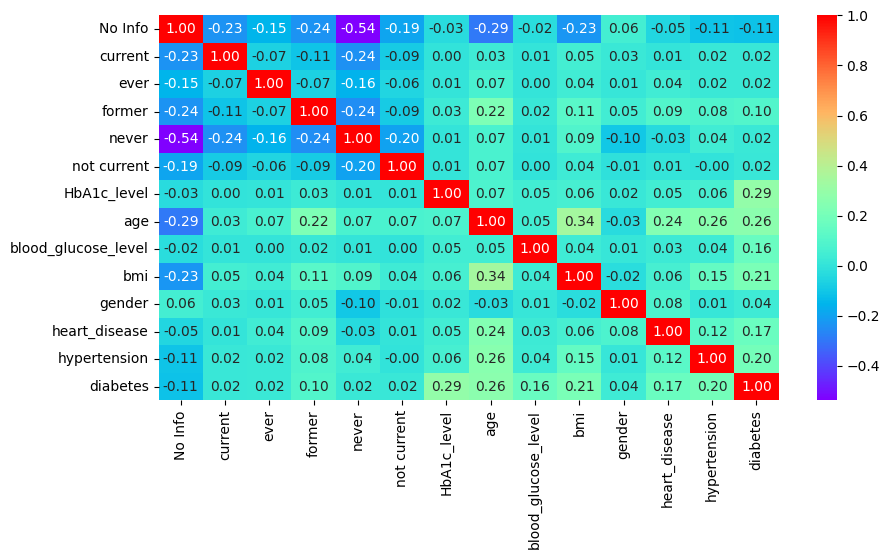

In [10]:
# plotting the confusion matrix
corr_matrix= df.corr()

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt='.2f',
                 cmap='rainbow')

After some thought, I decided to drop the folowing columns from the dataset:
1. gender
2. not current
3. never
4. No Info
5. bmi

In [11]:
unn = ['gender', 'not current', 'never', 'No Info']

df.drop([c for c in df.columns if c in unn], axis =1)

,current,ever,former,HbA1c_level,age,blood_glucose_level,bmi,heart_disease,hypertension,diabetes
0,0,0,0,6.6,80.0,140.0,25.19,1,0,0
1,0,0,0,6.6,54.0,80.0,27.32,0,0,0
2,0,0,0,5.7,28.0,158.0,27.32,0,0,0
3,1,0,0,5.0,36.0,155.0,23.45,0,0,0
4,1,0,0,4.8,76.0,155.0,20.14,1,1,0
...,...,...,...,...,...,...,...,...,...,...
96123,0,0,0,4.8,36.0,145.0,24.60,0,0,0
96124,0,0,0,6.5,2.0,100.0,17.37,0,0,0
96125,0,0,1,5.7,66.0,155.0,27.83,0,0,0
96126,0,0,0,4.0,24.0,100.0,35.42,0,0,0


In [12]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']


scaler = StandardScaler()

X = scaler.fit_transform(X)

# ***5. Balancing The Dataset Using SMOTE.***

In [13]:
ovs = SMOTE()

bal_X, bal_y = ovs.fit_resample(X,y)

In [14]:
print(f'new label count:\n{bal_y.value_counts()}')
print(f'old label count:\n{df.diabetes.value_counts()}')

new label count:
0    87646
1    87646
Name: diabetes, dtype: int64
old label count:
0    87646
1     8482
Name: diabetes, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(bal_X, bal_y, train_size=0.5, random_state=0)

In [16]:
knn = KNeighborsClassifier(n_neighbors=4)

model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'the accuracy of the model is {accuracy.round(4)*100}%')
print(classification_report(y_test, y_pred))

the accuracy of the model is 93.53%
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     43665
           1       0.91      0.96      0.94     43981

    accuracy                           0.94     87646
   macro avg       0.94      0.94      0.94     87646
weighted avg       0.94      0.94      0.94     87646



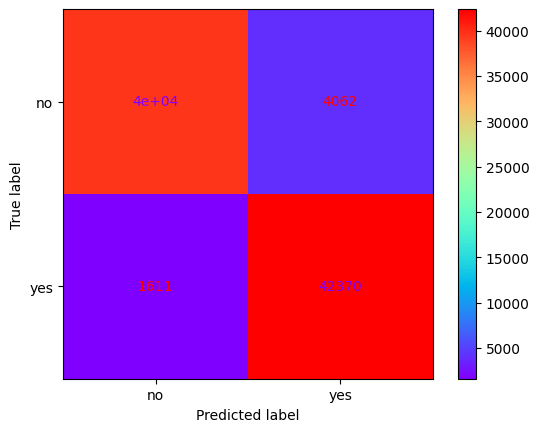

In [17]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes']).plot(cmap='rainbow')

Since I may want to improve the accuracy of my model, I will tune the hyperparametes for my classifier. I will use GridSearchCV for this exercise.

In [18]:
# list of the hyperparameters I want to tune for this model.
'''
leaf_size = [c for c in range(1,50)]
n_neighbors = [c for c in range(1,21)]
p=[1, 2]

# converting the hyperparametes into a dictionary

hyperparameters = {'leaf_size': leaf_size,
                   'p': p,
                   'n_neighbors': n_neighbors}

# creating a new KNN object

knn_2 = KNeighborsClassifier()

# using GridSearchView
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# fitting the model

best_model = clf.fit(X, y)

# printing the best hyperparameters.
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p: ', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbours: ', best_model.best_estimator_.get_params()['n_neighbors'])
'''

"\nleaf_size = [c for c in range(1,50)]\nn_neighbors = [c for c in range(1,21)]\np=[1, 2]\n\n# converting the hyperparametes into a dictionary\n\nhyperparameters = {'leaf_size': leaf_size,\n                   'p': p,\n                   'n_neighbors': n_neighbors}\n\n# creating a new KNN object\n\nknn_2 = KNeighborsClassifier()\n\n# using GridSearchView\nclf = GridSearchCV(knn_2, hyperparameters, cv=10)\n\n# fitting the model\n\nbest_model = clf.fit(X, y)\n\n# printing the best hyperparameters.\nprint('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])\nprint('Best p: ', best_model.best_estimator_.get_params()['p'])\nprint('Best n_neighbours: ', best_model.best_estimator_.get_params()['n_neighbors'])\n"

In [19]:

c = 10
#creating an array of classifiers

classifiers = { 
    #applying the K-Neighbours classifier
    'KNN classifier': KNeighborsClassifier(n_neighbors=4),
    #applying Support-Vector Machine(SVM)
    #using Ensemble Classifiers(Random Forest and AdaBoost)
    'RFST': RandomForestClassifier(n_estimators=100), #n_estimators = 100 means the RandomForestClassifier will create 100 decision trees
    'ADA': AdaBoostClassifier(n_estimators=100),
    #Using XGBClassifier
    'XGBClassifier':XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5),
    #Using CatBoostClassifier()
    'CATBOOST CLASSIFIER':CatBoostClassifier() 

}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy*100))
    print(classification_report(y_test, y_pred))

Accuracy (train) for KNN classifier: 93.5% 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     43665
           1       0.91      0.96      0.94     43981

    accuracy                           0.94     87646
   macro avg       0.94      0.94      0.94     87646
weighted avg       0.94      0.94      0.94     87646

Accuracy (train) for RFST: 97.0% 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43665
           1       0.97      0.97      0.97     43981

    accuracy                           0.97     87646
   macro avg       0.97      0.97      0.97     87646
weighted avg       0.97      0.97      0.97     87646

Accuracy (train) for ADA: 96.1% 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     43665
           1       0.97      0.96      0.96     43981

    accuracy                           0.96     87646
   macro avg     

In [21]:
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy is: ', accuracy.round(4))
print(classification_report(y_test, y_pred))

Accuracy is:  0.9807
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43665
           1       0.99      0.97      0.98     43981

    accuracy                           0.98     87646
   macro avg       0.98      0.98      0.98     87646
weighted avg       0.98      0.98      0.98     87646



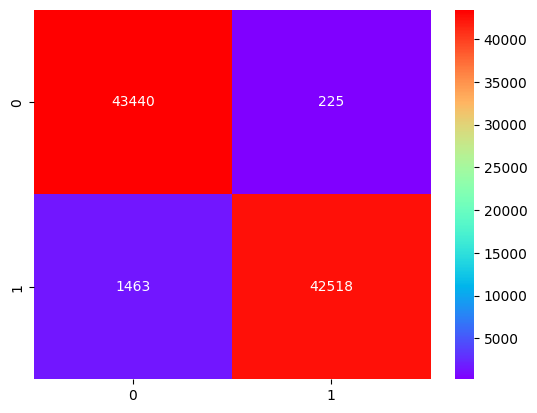

In [26]:
cm = confusion_matrix(y_test, y_pred)

fig,ax = plt.subplots(); ax = sns.heatmap(cm,
                                                         annot=True,
                                                         cmap='rainbow',
                                                         fmt='.0f')